In [26]:
#import the necessary libraries, 
    # pandas for data manipulation,
    # seaborn and matplotlib for data visualization, 
    # and scikit-learn for machine learning.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Load the Iris dataset from scikit-learn's built-in datasets. 
from sklearn.datasets import load_iris
iris = load_iris()

In [27]:
#print the dataset description
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [28]:
#Iris from sklearn comes with a bunch of different information (not just the data)
#  It comes with the data which has the 4 flower features 
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [29]:
#It also comes with target values. 
# The target values indicate which species/cluster each flower belongs to.
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [30]:
#Look at the first row of data and the target
print(iris.data[0, :], iris.target[0])

[5.1 3.5 1.4 0.2] 0


In [31]:
#Create a dataframe from the iris data
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

#Use the head method to see the top of the dataframe.
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
#Use the describe method on the DataFrame to get a summary of the data.
# This will give us the count, mean, standard deviation, minimum, and maximum values for each of the columns in the dataset.
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


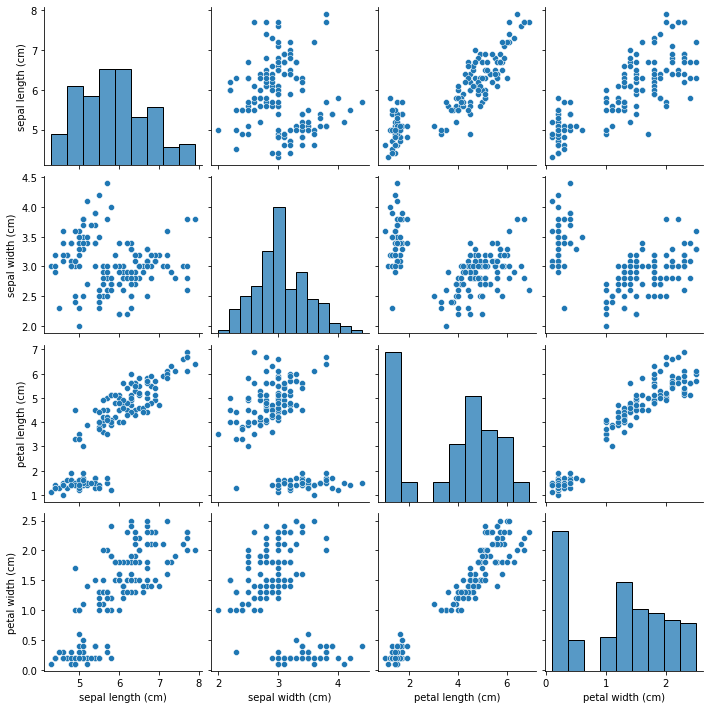

In [33]:
#Use the pairplot function to create a scatterplot matrix, 
# This will show the relationship between each pair of columns in the dataset.
sns.pairplot(iris_df)
plt.show()

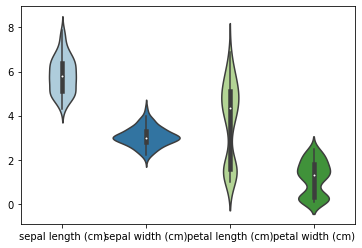

In [34]:
#Use the violinplot function to create a violinplot for each of the columns in the dataset.
# This shows the distribution of data in each column.
sns.violinplot(data=iris_df, palette="Paired")

<AxesSubplot:>

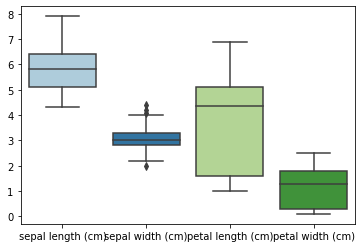

In [35]:
#Use the boxplot function to create a boxplot for each of the columns in the dataset. 
# This can help us identify any outliers in the data.
sns.boxplot(data=iris_df,palette="Paired")

<AxesSubplot:>

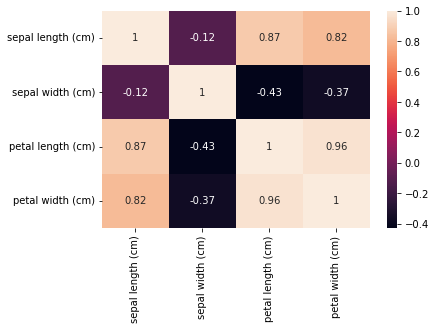

In [36]:
#Finally, we can use the heatmap function to create a heatmap of the correlations between the columns in the dataset. 
# This can help us identify which columns are most strongly correlated with each other.
sns.heatmap(iris_df.corr(), annot=True)

Text(0, 0.5, 'Inertia')

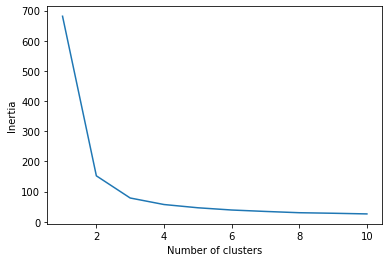

In [37]:
#Determine the optimal number of clusters using the elbow method

# Make a list of inertia for each number of clusters (1-10)
inertia = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(iris_df)
    inertia.append(km.inertia_)

# Plot the inertia for each number of clusters
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [40]:
#Fit a k-means model to the data with 3 clusters

km = KMeans(n_clusters=3, random_state=0)
km.fit(iris_df)

KMeans(n_clusters=3, random_state=0)

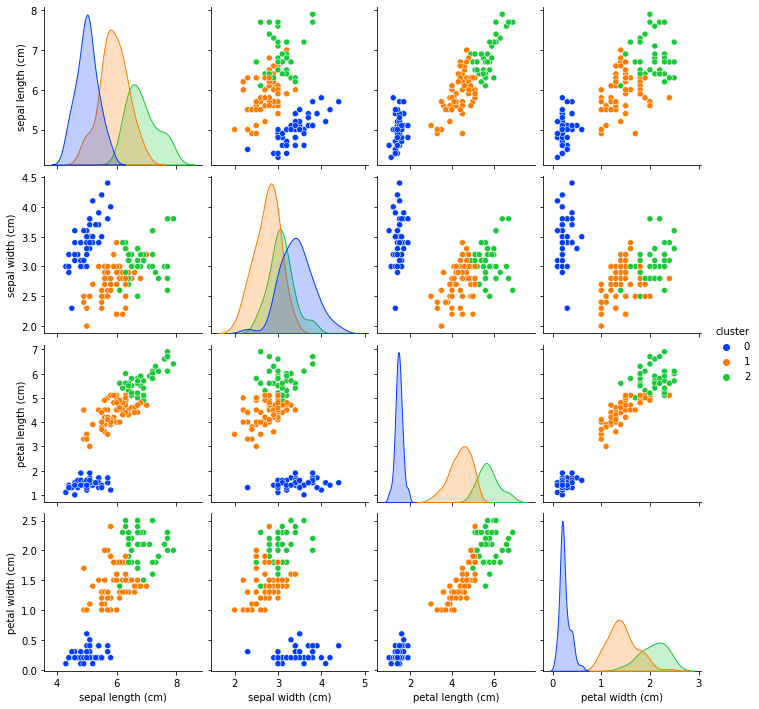

In [41]:
#Visualize clusters

# Create a list with the predicted cluster labels
labels=km.labels_

# Add the predicted cluster labels to the dataframe
iris_df['cluster'] = km.labels_

# Create a pairplot of the data with the predicted clusters
sns.pairplot(iris_df, hue='cluster',palette="bright")

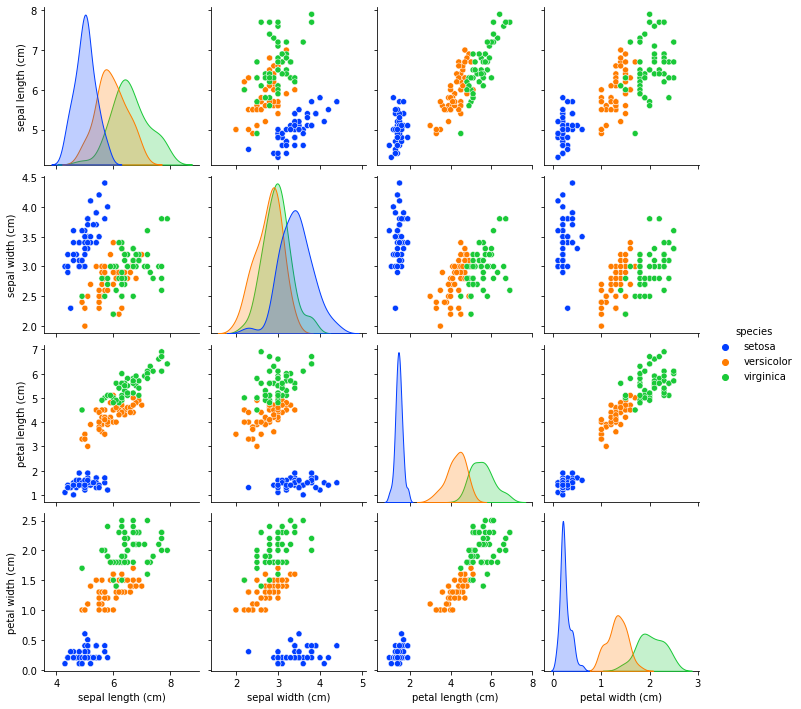

In [42]:
#Visually compare the predicted cluster labels to the real/target species

# Creat a list that has the list of targets as the actual species name
species=[iris.target_names[t] for t in list(iris.target)]

# Make a dataframe of the iris data with the actual target/species
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = species

# Create a pairplot of the data with the actual species
sns.pairplot(df, hue='species',palette="bright")

In [43]:
#Use crosstabulation to do farther evaluation of the clustering

# Make a dataframe with a column for the cluster labels and a column with the target/species
crosstabDF = pd.DataFrame({'labels': labels, 'species': species})
# Crostabulate the coulumns
crosstab = pd.crosstab(crosstabDF['labels'], crosstabDF['species'])
print(crosstab)
print("\nSetosa was clustered with 100% accuracy.\nVersicolor was clustered with 96% accuracy.\nVirginica was the worst with only 72% accuracy.")

species  setosa  versicolor  virginica
labels                                
0            50           0          0
1             0          48         14
2             0           2         36

Setosa was clustered with 100% accuracy.
Versicolor was clustered with 96% accuracy.
Virginica was the worst with only 72% accuracy.
